In [4]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter
import pandas as pd

# Challenge 1

In [150]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.0M    0 24.0M    0     0   575k      0 --:--:--  0:00:42 --:--:--  575k


In [151]:
with open('turnstile_150627.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [152]:
len(rows)

192568

In [153]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [154]:
raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))

# Challenge 2

In [155]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}

In [156]:
print datetime_cumulative.keys()[0]
datetime_cumulative[datetime_cumulative.keys()[0]]

('A030', 'R083', '01-06-00', '23 ST-5 AVE')


[(datetime.datetime(2015, 6, 20, 0, 0), 5938862),
 (datetime.datetime(2015, 6, 20, 4, 0), 5938915),
 (datetime.datetime(2015, 6, 20, 8, 0), 5938934),
 (datetime.datetime(2015, 6, 20, 12, 0), 5939047),
 (datetime.datetime(2015, 6, 20, 16, 0), 5939329),
 (datetime.datetime(2015, 6, 20, 20, 0), 5939679),
 (datetime.datetime(2015, 6, 21, 0, 0), 5939870),
 (datetime.datetime(2015, 6, 21, 4, 0), 5939929),
 (datetime.datetime(2015, 6, 21, 8, 0), 5939946),
 (datetime.datetime(2015, 6, 21, 12, 0), 5940029),
 (datetime.datetime(2015, 6, 21, 16, 0), 5940234),
 (datetime.datetime(2015, 6, 21, 20, 0), 5940488),
 (datetime.datetime(2015, 6, 22, 0, 0), 5940637),
 (datetime.datetime(2015, 6, 22, 4, 0), 5940660),
 (datetime.datetime(2015, 6, 22, 7, 33, 53), 5940726),
 (datetime.datetime(2015, 6, 22, 7, 35, 9), 5940728),
 (datetime.datetime(2015, 6, 22, 8, 0), 5940768),
 (datetime.datetime(2015, 6, 22, 12, 0), 5941224),
 (datetime.datetime(2015, 6, 22, 16, 0), 5941639),
 (datetime.datetime(2015, 6, 22, 

In [ ]:
#print datetime_cumulative.items()[0]

In [157]:
for rows in datetime_cumulative.values():
    assert rows == sorted(rows)

In [158]:
[(i,j)   for i in range(5) for j in range(3,6)]

[(0, 3),
 (0, 4),
 (0, 5),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 3),
 (4, 4),
 (4, 5)]

In [159]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [160]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()
print all_counts[-50:]

[2428, 2443, 2444, 2447, 2448, 2455, 2456, 2459, 2473, 2474, 2487, 2492, 2514, 2521, 2536, 2548, 2552, 2554, 2558, 2567, 2569, 2579, 2602, 2612, 2621, 2622, 2630, 2630, 2644, 2656, 2670, 2671, 2692, 2728, 2731, 2757, 2765, 2804, 2844, 2848, 2920, 2926, 2926, 3488, 87577, 130932, 131711, 131792, 531430, 117440499]


In [161]:
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print Counter(all_times).most_common(10)

[(4.0, 172791), (4.2, 10460), (8.0, 189), (4.433333333333334, 161), (0.02222222222222222, 80), (0.02277777777777778, 64), (0.022500000000000003, 55), (0.02777777777777778, 26), (0.03611111111111111, 24), (3.963888888888889, 24)]


In [162]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

In [163]:
all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print len(all_good_counts) / len(all_counts)

0.99415985405


In [164]:
all_good_counts.sort()
print all_good_counts[-5:]

[2848, 2920, 2926, 2926, 3488]


In [165]:
print all_good_counts[:5]

[0, 0, 0, 0, 0]


# Challenge 3

In [166]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

In [167]:
datetime_counts.items()

[(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
  [(datetime.datetime(2015, 6, 20, 0, 0), 53),
   (datetime.datetime(2015, 6, 20, 4, 0), 19),
   (datetime.datetime(2015, 6, 20, 8, 0), 113),
   (datetime.datetime(2015, 6, 20, 12, 0), 282),
   (datetime.datetime(2015, 6, 20, 16, 0), 350),
   (datetime.datetime(2015, 6, 20, 20, 0), 191),
   (datetime.datetime(2015, 6, 21, 0, 0), 59),
   (datetime.datetime(2015, 6, 21, 4, 0), 17),
   (datetime.datetime(2015, 6, 21, 8, 0), 83),
   (datetime.datetime(2015, 6, 21, 12, 0), 205),
   (datetime.datetime(2015, 6, 21, 16, 0), 254),
   (datetime.datetime(2015, 6, 21, 20, 0), 149),
   (datetime.datetime(2015, 6, 22, 0, 0), 23),
   (datetime.datetime(2015, 6, 22, 4, 0), 66),
   (datetime.datetime(2015, 6, 22, 7, 33, 53), 2),
   (datetime.datetime(2015, 6, 22, 7, 35, 9), 40),
   (datetime.datetime(2015, 6, 22, 8, 0), 456),
   (datetime.datetime(2015, 6, 22, 12, 0), 415),
   (datetime.datetime(2015, 6, 22, 16, 0), 1090),
   (datetime.datetime(2015, 6, 22

In [40]:
import matplotlib.pyplot as plt
% matplotlib inline

# Challenge 4

In [169]:
day_counts.values()[0] #use first station

[(datetime.date(2015, 6, 20), 1008),
 (datetime.date(2015, 6, 21), 767),
 (datetime.date(2015, 6, 22), 2438),
 (datetime.date(2015, 6, 23), 2651),
 (datetime.date(2015, 6, 24), 2680),
 (datetime.date(2015, 6, 25), 2683),
 (datetime.date(2015, 6, 26), 1951)]

In [170]:
items = []
[items.append(i) for i in day_counts.values()[0]]

[None, None, None, None, None, None, None]

In [171]:
counts = []
[counts.append(i[1]) for i in items]

[None, None, None, None, None, None, None]

In [172]:
dates = []
[dates.append(i[0]) for i in items]

[None, None, None, None, None, None, None]

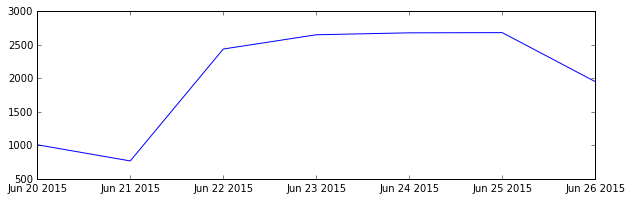

In [173]:
#Take the list of [(date1, count1), (date2, count2), ...], for the
#turnstile and turn it into two lists:
#dates and counts. This should plot it:

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

# Challenge 5

In [174]:
import pandas as pd

In [175]:
df2 = df.groupby(['ca', 'station', 'unit', 'date']).sum()[['entries', 'exits']].reset_index()

In [176]:
df2.head()

,ca,station,unit,date,entries,exits
0,A002,LEXINGTON AVE,R051,06/20/2015,300056246,169084500
1,A002,LEXINGTON AVE,R051,06/21/2015,300115957,169119363
2,A002,LEXINGTON AVE,R051,06/22/2015,300177800,169166276
3,A002,LEXINGTON AVE,R051,06/23/2015,350326135,197432442
4,A002,LEXINGTON AVE,R051,06/24/2015,300390869,169295504


df2 is an answer to question 5

# Challenge 6

In [ ]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [70]:
df = pd.DataFrame(rows)
df.columns = ["ca", "unit", "scp", "station", "linename", "division", "date", "time", "desc", "entries", "exits"]
df.head()

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/20/2015,00:00:00,REGULAR,0005192500,0001756572
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/20/2015,04:00:00,REGULAR,0005192550,0001756580
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/20/2015,08:00:00,REGULAR,0005192568,0001756609
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/20/2015,12:00:00,REGULAR,0005192670,0001756706
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,06/20/2015,16:00:00,REGULAR,0005192886,0001756776


In [71]:
df[['entries', 'exits']] = df[['entries', 'exits']].apply(pd.to_numeric)

In [72]:
df3 = df.groupby(['station', 'date']).sum()[['entries', 'exits']].reset_index()

In [73]:
df3.head()

,station,date,entries,exits
0,1 AVE,06/20/2015,8421439330,8790034167
1,1 AVE,06/21/2015,8421544761,8790146740
2,1 AVE,06/22/2015,8421645439,8790258723
3,1 AVE,06/23/2015,8421784939,8790402288
4,1 AVE,06/24/2015,8421927915,8790551376


df3 is an answer to question 6

# Question 7

Plot the time series for a station.

In [85]:
#df3

In [79]:
df_plot = df3[df3['station'] == "1 AVE"][['entries', 'exits', 'date']]
df_plot['sums'] = df_plot['entries'] + df_plot['exits']

In [82]:
df_plot['date'] = [datetime.strptime(t,"%m/%d/%Y") for t in df_plot['date']]

In [83]:
df_plot

,entries,exits,date,sums
0,8421439330,8790034167,2015-06-20,17211473497
1,8421544761,8790146740,2015-06-21,17211691501
2,8421645439,8790258723,2015-06-22,17211904162
3,8421784939,8790402288,2015-06-23,17212187227
4,8421927915,8790551376,2015-06-24,17212479291
5,8422075347,8790700300,2015-06-25,17212775647
6,8422227579,8790855959,2015-06-26,17213083538


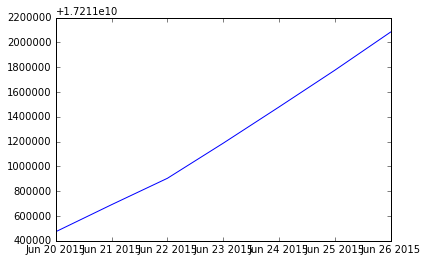

In [84]:
plt.plot(df_plot.date, df_plot.sums)

# Question 8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

In [145]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_151010.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.1M    0 24.1M    0     0   567k      0 --:--:--  0:00:43 --:--:--  584k


In [146]:
with open('turnstile_151010.txt') as f:
    reader = csv.reader(f)
    rows_151010 = [[cell.strip() for cell in row] for row in reader]

In [147]:
df_151010 = pd.DataFrame(rows_151010)
df_151010.columns = ["ca", "unit", "scp", "station", "linename", "division", "date", "time", "desc", "entries", "exits"]
df_151010.to_csv('151010.csv')

In [1]:
files = ['turnstile_150704.txt', 'turnstile_150711.txt', 'turnstile_150718.txt',
           'turnstile_150725.txt', 'turnstile_150801.txt', 'turnstile_150808.txt', 'turnstile_150815.txt', 
         'turnstile_150822.txt', 'turnstile_150829.txt', 'turnstile_150905.txt', 'turnstile_150912.txt']

In [23]:
rows = {}
dataframes = []
for file in files:
    with open(file) as f:
        reader = csv.reader(f)
        rows[file] = [[cell.strip() for cell in row] for row in reader]
        df = pd.DataFrame(rows[file])
        df = df[1:]
        df.columns = ["ca", "unit", "scp", "station", "linename", "division", "date", "time", "desc", "entries", "exits"]
        df[['entries', 'exits']] = df[['entries', 'exits']].apply(pd.to_numeric)
        df = df.groupby(['station', 'date']).sum()[['entries', 'exits']].reset_index()
        df = df[df['station'] == "1 AVE"][['entries', 'exits', 'date']]
        df['sums'] = df['entries'] + df['exits']
        df['date'] = [datetime.strptime(t,"%m/%d/%Y") for t in df['date']]
        dataframes.append(df)

In [24]:
%matplotlib inline


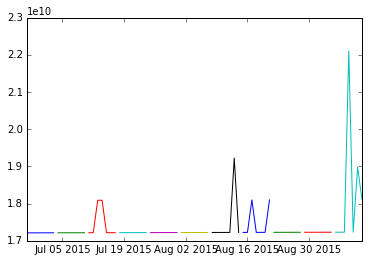

In [27]:
for df in dataframes:
    plt.plot(df.date, df.sums)

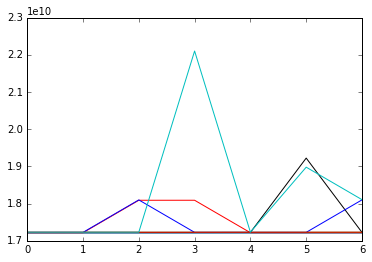

In [29]:
for df in dataframes:
    plt.plot(df.sums)

# Question 9
- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [26]:
rows = {}
dataframes = []
for file in files:
    with open(file) as f:
        reader = csv.reader(f)
        rows[file] = [[cell.strip() for cell in row] for row in reader]
        df = pd.DataFrame(rows[file])
        df = df[1:]
        df.columns = ["ca", "unit", "scp", "station", "linename", "division", "date", "time", "desc", "entries", "exits"]
        df[['entries', 'exits']] = df[['entries', 'exits']].apply(pd.to_numeric)
        df['sums'] = df['entries'] + df['exits']
        df['date'] = [datetime.strptime(t,"%m/%d/%Y") for t in df['date']]
        df = df[['station', 'sums']]
        #print df.head()
        dataframes.append(df)

In [21]:
#dataframes

In [27]:
r = pd.concat(dataframes)

In [28]:
r.head()

,station,sums
1,LEXINGTON AVE,6963663
2,LEXINGTON AVE,6963726
3,LEXINGTON AVE,6963770
4,LEXINGTON AVE,6963982
5,LEXINGTON AVE,6964330


In [29]:
result = r.groupby('station').sum().sort()

/Users/kpully/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


In [36]:
result.sort(['sums'], ascending=False)

/Users/kpully/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,sums
station,
42 ST-PA BUS TE,6696693676466
57 ST-7 AVE,6523483515314
59 ST-COLUMBUS,4267171150569
42 ST-TIMES SQ,3960509662110
FULTON ST,3675817356089
CHAMBERS ST,3497960577211
125 ST,3009923142937
23 ST-6 AVE,2958689712590
23 ST,2861239985361


result.sort(['sums'], ascending=False) is an answer to question 9

# Question 10

In [38]:
total_ridership_counts = result.sort(['sums'], ascending=False).copy()

/Users/kpully/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [43]:
#total_ridership_counts

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a36ed410>]], dtype=object)

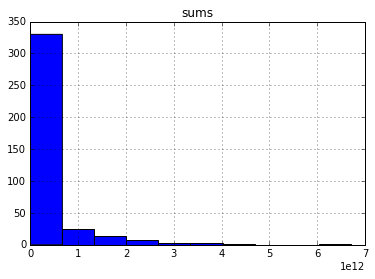

In [44]:
total_ridership_counts.hist()

the histogram above is an answer to question 10